In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
#configuring the plot we gonna use
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r"E:\programming prj\Python\Movie industry\movies.csv")
#pd.set_option("display.max_rows",8000)

#lets see is there any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

#cleaning the dataframe from null data
df.dropna(inplace=True)
np.sum(df.isnull())

#giving new indexes adn fill the space between numbers
#df = df.reset_index(drop = True)

#deleting cell that not match the format with others
df.drop([312,449,467,800,1819,1173,1212,1404,2029,2318,2319,2816,4187,5833], inplace = True)
#171/250+1=251/254+2=256/434+3=437...
#df = df.reset_index(drop = True)

#data types of the dataset columns
#df.dtypes

#change data type of the columns
df["budget"] = df["budget"].astype('int64')
df["gross"] = df["gross"].astype('int64')
#df.dtypes

#create correct year column
df["released"] = list(df["released"].str.split(", "))
i = 0

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


C:\Users\zzz\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
for index in df.index:
    #this way i found the index of the row that caused problem and drop them before they reach here in line 32 in cell 1
    #print(index)
    #print(df["released"][index][1])

    #using split function we got 4 number year and now we put it in df["released"]
    df["released"][index] = df["released"][index][1]
df["yearcorrect"] = df["released"].astype(str).str[:4]

In [3]:
df.drop_duplicates()
df.sort_values(by=['gross'], inplace = False,ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,2009 (United States),7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019 (United States),8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997 (United States),7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015 (United States),7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018 (United States),8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,2015 (Sweden),5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,1994 (South Korea),4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,2001 (Canada),6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,1982 (United States),3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982


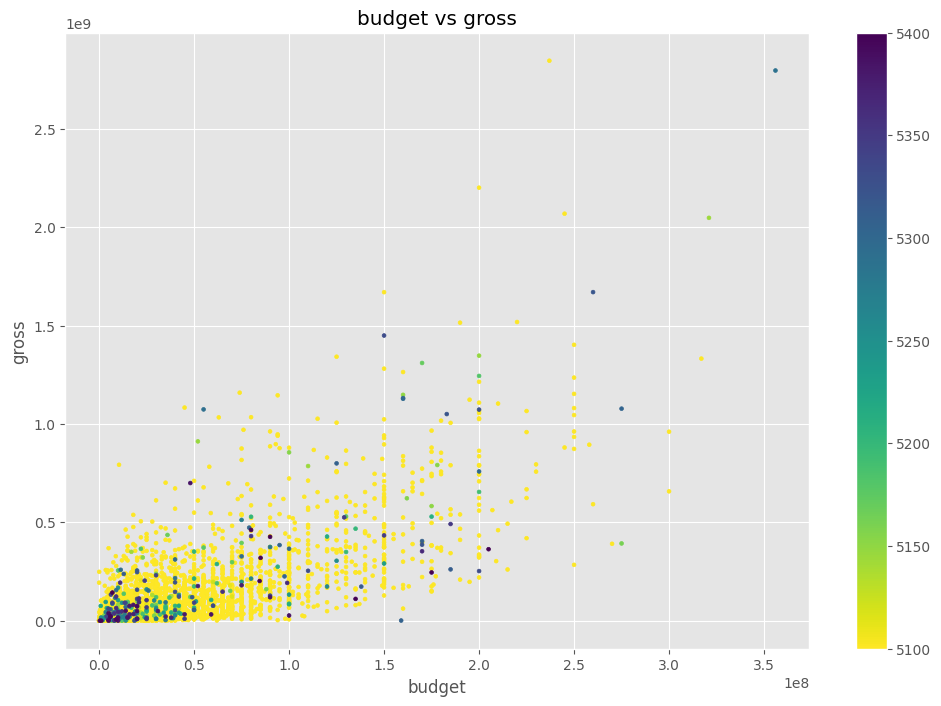

In [4]:
#budget would have high correlation
#company would have high correlation

#scatter plot with budjet vs gross
list = [*range(0,5407)]
plt.scatter(x = df['budget'],y = df['gross'], s = 30, c = list, marker = ".", cmap = "viridis_r", vmin = 5100, vmax = 5400)
plt.colorbar()
plt.title('budget vs gross')
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()

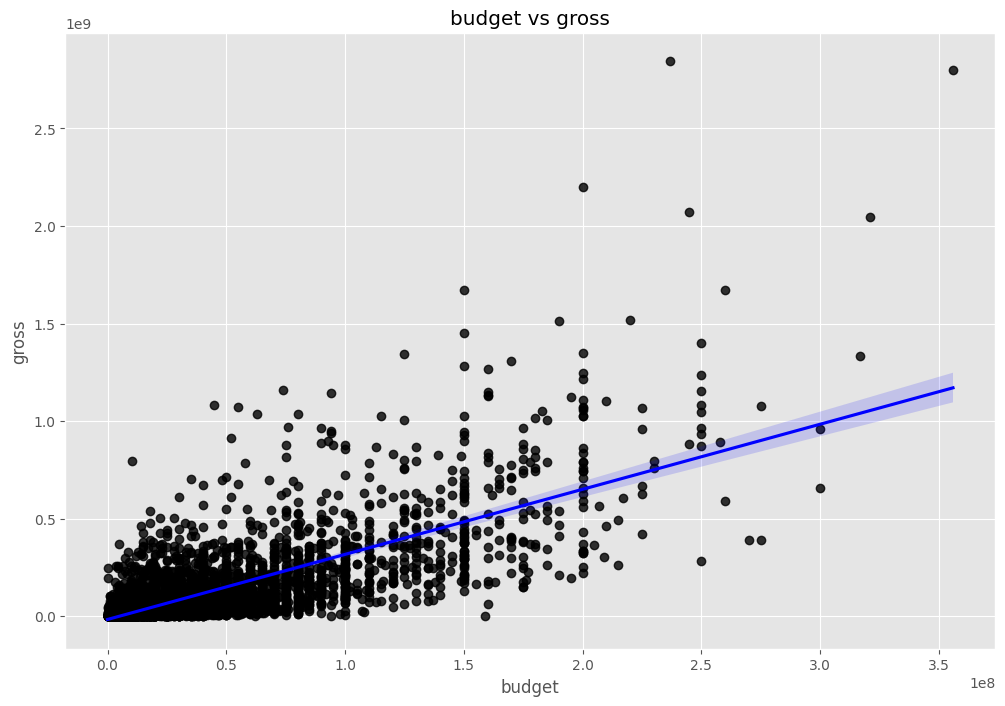

In [5]:
#reg plot using seaboen
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color" : "black"}, line_kws = {"color" : "blue"})
plt.title('budget vs gross')
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()


In [6]:
#lets start look at correlation
df.corr(numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.055681,0.204904,0.326740,0.273512,0.074849
score,0.055681,1.000000,0.474594,0.071552,0.222504,0.414501
votes,0.204904,0.474594,1.000000,0.439077,0.614432,0.352263
budget,0.326740,0.071552,0.439077,1.000000,0.740028,0.318353
gross,0.273512,0.222504,0.614432,0.740028,1.000000,0.275641
runtime,0.074849,0.414501,0.352263,0.318353,0.275641,1.000000


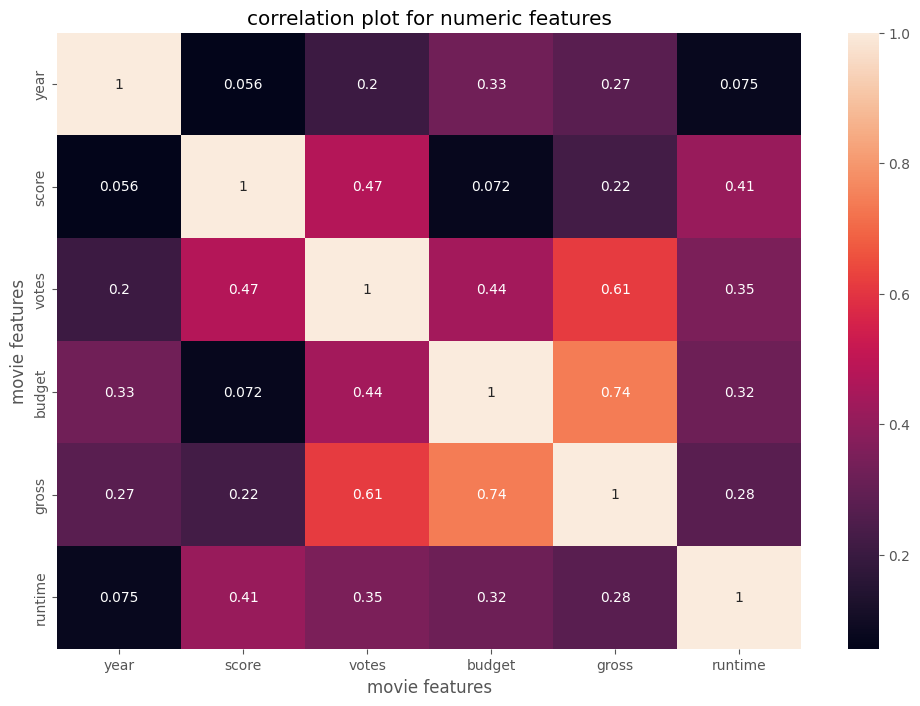

In [7]:
correlation_matrix = df.corr(numeric_only = True) 
sns.heatmap(correlation_matrix, annot = True)
plt.title('correlation plot for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

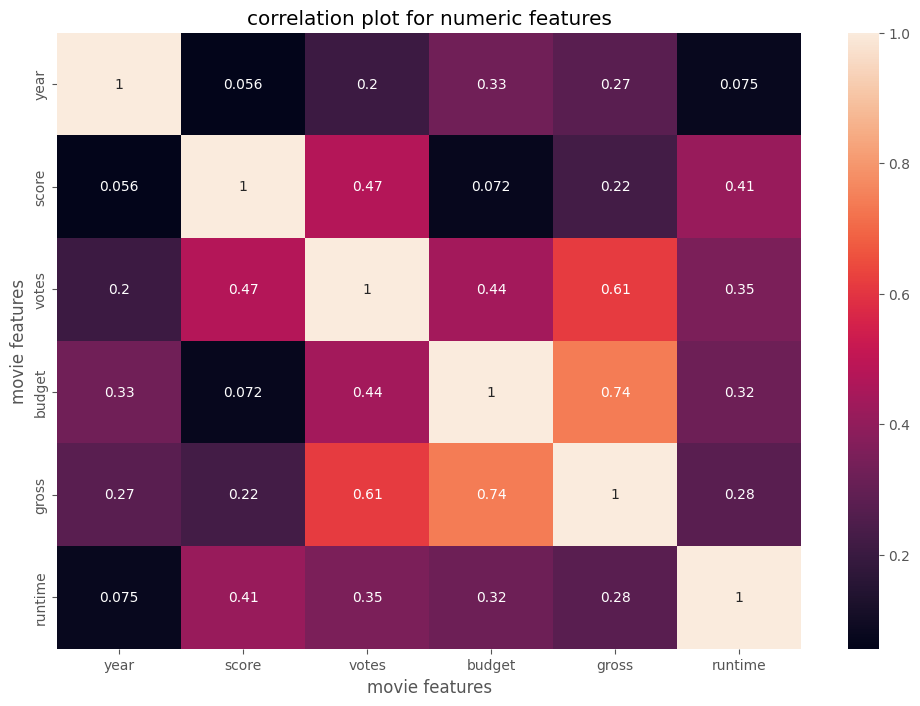

In [8]:
#changing string data types to numeric
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized = df_numerized.reset_index(drop = True)

correlation_mat = df_numerized.corr(numeric_only = True) 
sns.heatmap(correlation_matrix, annot = True)
plt.title('correlation plot for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [9]:
corr_pairs = correlation_mat.unstack()
corr_pairs_sorted = corr_pairs.sort_values()
corr_pairs_sorted

budget       genre         -0.368226
genre        budget        -0.368226
gross        genre         -0.243547
genre        gross         -0.243547
rating       budget        -0.203553
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [10]:
high_corr = corr_pairs_sorted[(corr_pairs_sorted > 0.5) & (corr_pairs_sorted != 1)]
high_corr

votes        gross          0.614432
gross        votes          0.614432
             budget         0.740028
budget       gross          0.740028
released     year           0.972739
year         released       0.972739
yearcorrect  released       0.973513
released     yearcorrect    0.973513
year         yearcorrect    0.998962
yearcorrect  year           0.998962
dtype: float64

In [11]:
#votes and gross are the most correlated attribute